In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../dataset/economics_and_education_dataset_CSV.csv')

#EDA

In [4]:
df.head()

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0


In [5]:
df.describe()

,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,time,rating
count,598.000000,634.000000,537.000000,634.000000,634.000000,559.000000,634.000000,634.000000,634.000000,634.000000,586.000000,586.000000,111.000000,634.000000,634.000000,634.000000,634.000000
mean,5.234382,5.030442,33.386592,36427.228945,2.281682,3.118089,7.577166,22.454284,134.569313,13.433438,20.114142,28.065086,9.452505,5.972791,77.464711,2010.850158,489.311918
std,1.107487,4.096892,6.837867,16370.825200,2.743838,6.122273,3.972348,3.902270,134.011335,6.159732,5.775884,13.212550,2.696902,1.737748,11.020091,5.103474,37.689725
min,3.040150,1.900000,24.400000,9587.557951,-4.478103,0.000000,2.246000,10.770040,2.567036,2.200000,7.903518,7.173176,1.895130,2.413703,51.758000,2003.000000,348.000000
25%,4.455198,3.000000,28.100000,26438.016302,0.794377,0.830965,4.822500,20.169983,26.429162,9.600000,15.517907,17.910677,7.847910,4.502748,69.565000,2006.000000,480.000000
50%,5.058085,3.700000,32.700000,34603.255857,1.954195,1.095505,6.777000,22.450763,102.156944,12.800000,20.951774,25.490450,9.916870,6.137266,79.764000,2012.000000,496.000000
75%,5.797660,5.000000,35.200000,43042.279767,2.919548,1.815805,9.243000,24.128043,193.696331,16.700000,24.221855,34.385329,11.462780,7.407708,85.732500,2015.000000,513.000000
max,8.448880,25.300000,57.600000,116498.512081,21.602438,29.581371,24.981000,36.800286,528.969011,34.200000,33.921619,65.517310,15.058720,9.276339,98.001000,2018.000000,562.114000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index_code                             634 non-null    object 
 1   expenditure_on _education_pct_gdp      598 non-null    float64
 2   mortality_rate_infant                  634 non-null    float64
 3   gini_index                             537 non-null    float64
 4   gdp_per_capita_ppp                     634 non-null    float64
 5   inflation_consumer_prices              634 non-null    float64
 6   intentional_homicides                  559 non-null    float64
 7   unemployment                           634 non-null    float64
 8   gross_fixed_capital_formation          634 non-null    float64
 9   population_density                     634 non-null    float64
 10  suicide_mortality_rate                 634 non-null    float64
 11  tax_re

In [7]:
df.shape

(634, 20)

In [8]:
df.isnull().sum()

index_code                                 0
expenditure_on _education_pct_gdp         36
mortality_rate_infant                      0
gini_index                                97
gdp_per_capita_ppp                         0
inflation_consumer_prices                  0
intentional_homicides                     75
unemployment                               0
gross_fixed_capital_formation              0
population_density                         0
suicide_mortality_rate                     0
tax_revenue                               48
taxes_on_income_profits_capital           48
alcohol_consumption_per_capita           523
government_health_expenditure_pct_gdp      0
urban_population_pct_total                 0
country                                    0
time                                       0
sex                                        0
rating                                     0
dtype: int64

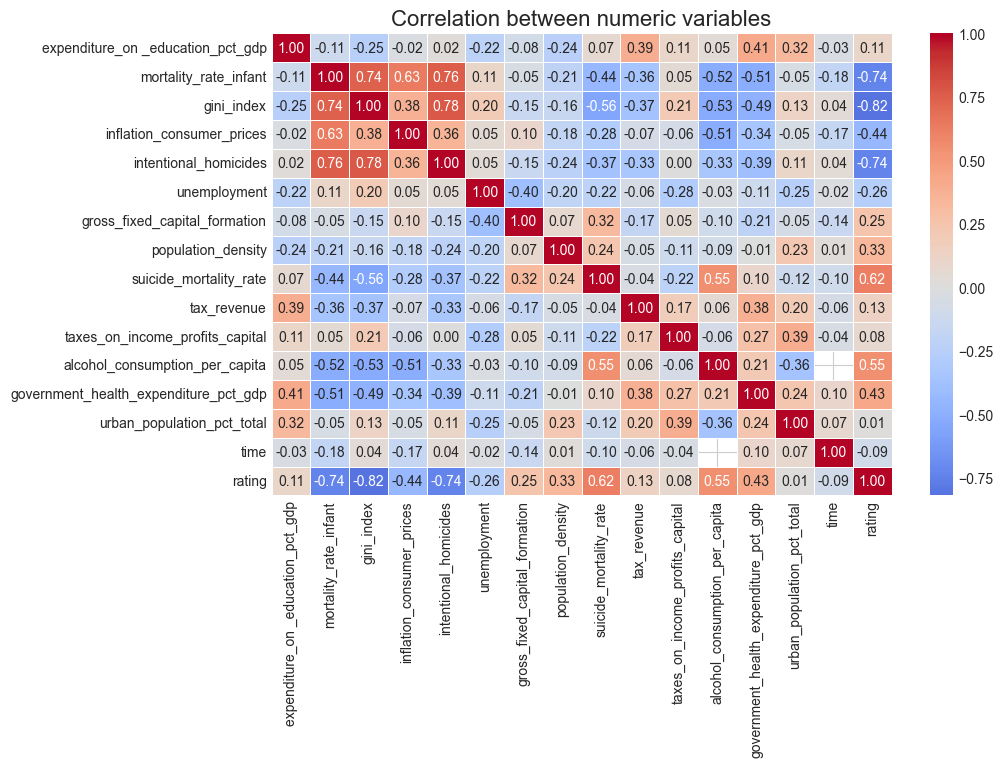

In [9]:
corr_df = df[["expenditure_on _education_pct_gdp","mortality_rate_infant","gini_index","inflation_consumer_prices","intentional_homicides","unemployment","gross_fixed_capital_formation","population_density","suicide_mortality_rate","tax_revenue","taxes_on_income_profits_capital","alcohol_consumption_per_capita","government_health_expenditure_pct_gdp","urban_population_pct_total","time","rating"]]
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,linewidths=0.5,cbar=True,fmt='.2f')
plt.title("Correlation between numeric variables",fontsize=16)
plt.show()

##Rating

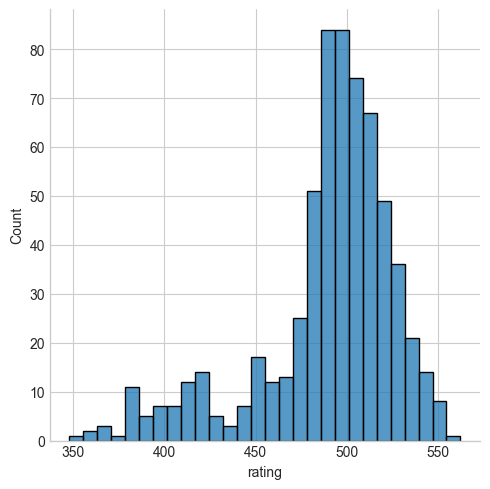

In [10]:
# Checking output distribution
sns.displot(df['rating'])

##Country

In [11]:
len(df['country'].unique())

39

In [12]:
country_count_df = df.groupby('time')['country'].nunique().reset_index()
country_count_df.columns = ['year', 'unique_countries']
country_count_df

,year,unique_countries
0,2003,31
1,2006,36
2,2009,35
3,2012,36
4,2015,37
5,2018,39


In [13]:
df.groupby(['country', 'time']).size().unstack().notna()


time,2003,2006,2009,2012,2015,2018
country,,,,,,
AUS,True,True,True,True,True,True
AUT,True,True,False,True,True,True
BEL,True,True,True,True,True,True
BRA,True,True,True,True,True,True
CAN,True,True,True,True,True,True
CHE,True,True,True,True,True,True
CHL,False,True,True,True,True,True
COL,False,False,False,False,True,True
CRI,False,False,False,False,False,True


##Sex

In [14]:
sex_type = df['sex'].unique()
sex_type

array(['BOY', 'GIRL', 'TOT'], dtype=object)

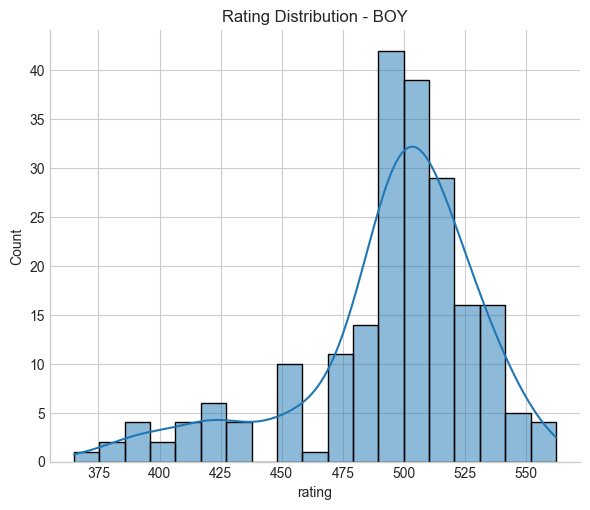

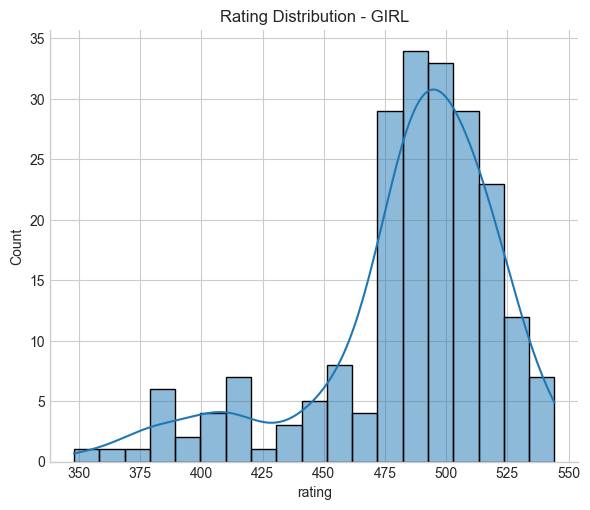

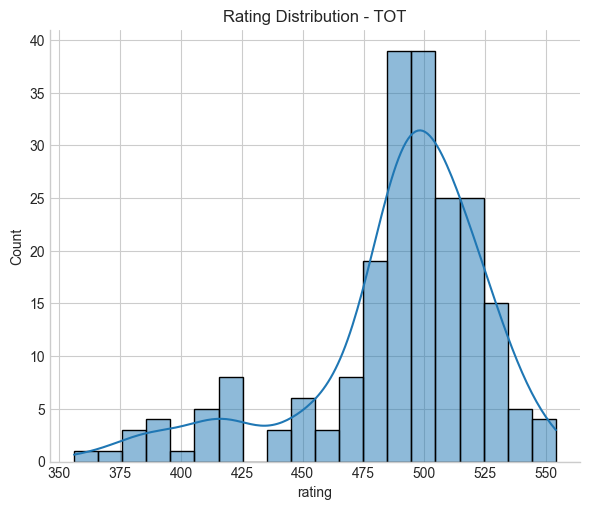

In [15]:
for sex in sex_type:
    subset = df[df['sex'] == sex]
    sns.displot(data=subset, x='rating', kde=True, height=5, aspect=1.2)
    plt.title(f'Rating Distribution - {sex}')
    plt.show()

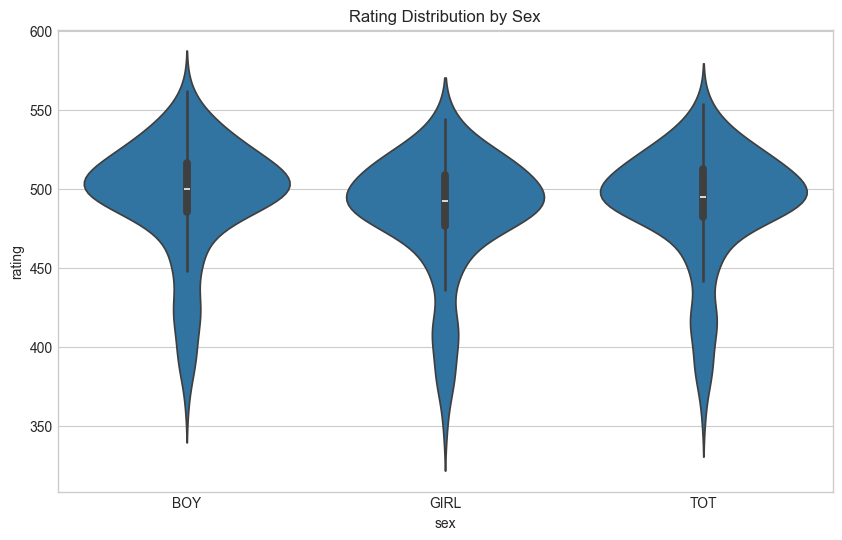

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sex', y='rating')
plt.title('Rating Distribution by Sex')
plt.show()

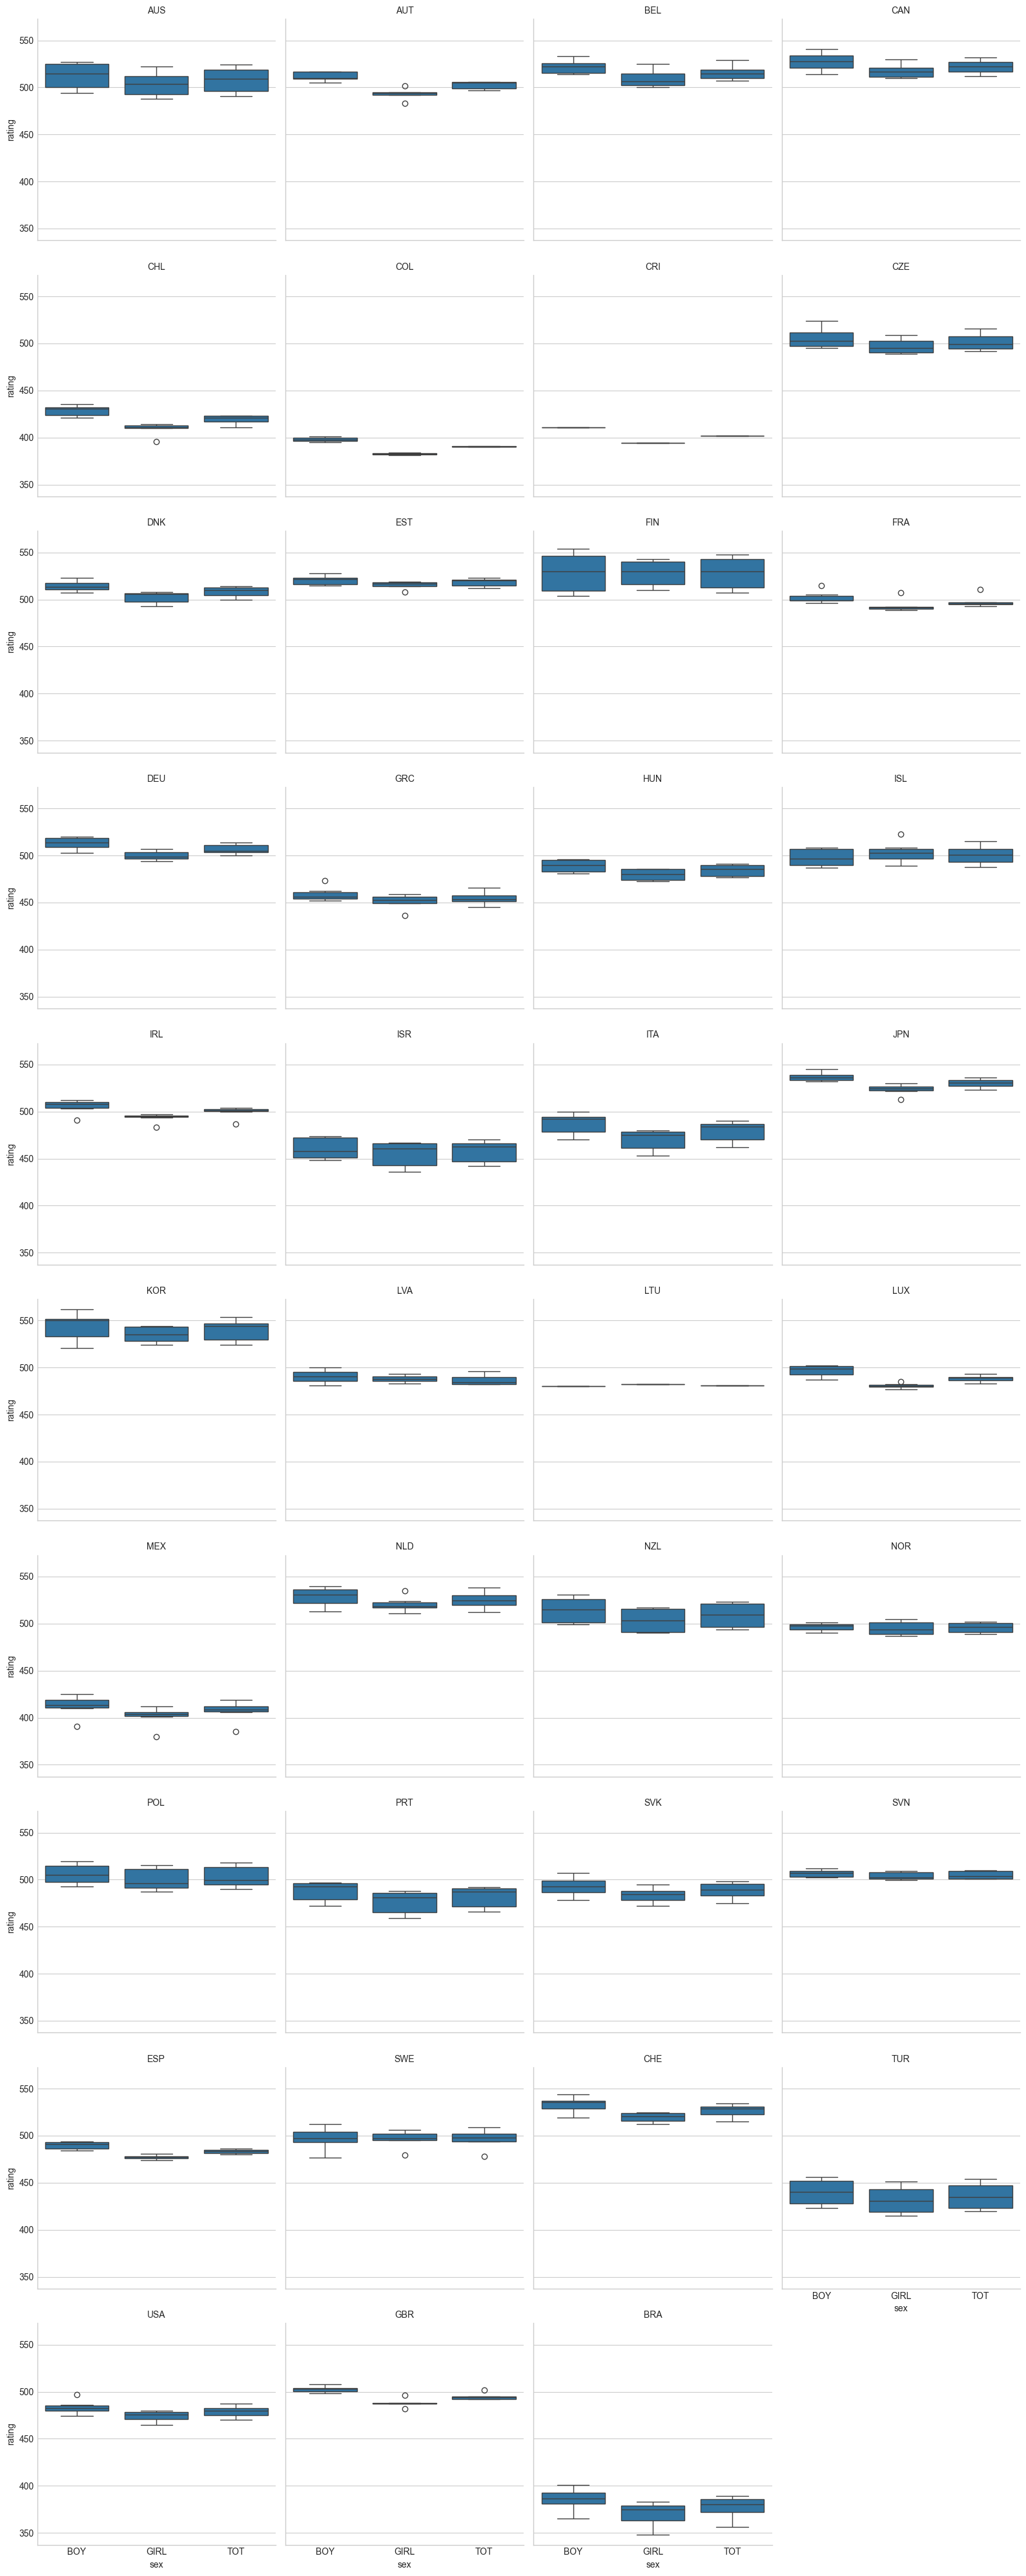

In [17]:
g = sns.FacetGrid(df, col='country', col_wrap=4, height=4)
g.map(sns.boxplot, 'sex', 'rating')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

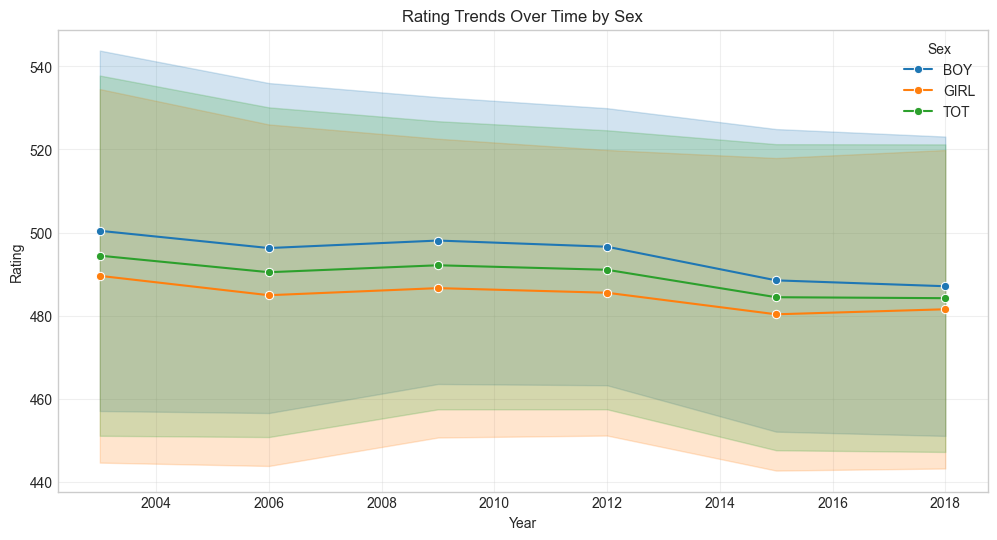

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='time', y='rating', hue='sex',
             marker='o', ci='sd')
plt.title('Rating Trends Over Time by Sex')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(title='Sex')
plt.grid(alpha=0.3)
plt.show()

##Expenditure on  education percentage gdp

<Axes: xlabel='expenditure_on _education_pct_gdp', ylabel='Density'>

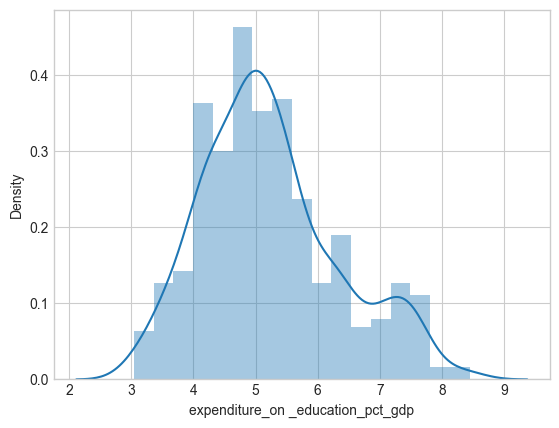

In [19]:
sns.distplot(df['expenditure_on _education_pct_gdp'])


##Gini index

In [20]:
NaN_gini_idx = df[df['gini_index'].isnull()]
NaN_gini_idx['country'].unique()

array(['AUS', 'CHL', 'CZE', 'HUN', 'ISL', 'JPN', 'KOR', 'LVA', 'MEX',
       'NLD', 'NZL', 'POL', 'SVK', 'CHE'], dtype=object)

In [21]:
countries_with_only_nan_gini_idx = set(df[df['gini_index'].isnull()]['country'].unique()) - set(df[df['gini_index'].notnull()]['country'].unique())

for country in countries_with_only_nan_gini_idx:
    print(country)

JPN
NZL


In [22]:
not_NaN_gini_idx = df[df['gini_index'].notnull()]
not_NaN_gini_idx

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
15,AUS-2018,5.124310,3.2,34.3,50251.335338,1.911401,0.884735,5.300,24.365258,3.245345,12.4,23.177203,65.164151,NaN,7.203527,86.012,AUS,2018,BOY,494.0
16,AUS-2018,5.124310,3.2,34.3,50251.335338,1.911401,0.884735,5.300,24.365258,3.245345,12.4,23.177203,65.164151,NaN,7.203527,86.012,AUS,2018,GIRL,488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,GIRL,370.0
630,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,TOT,377.0
631,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,BOY,388.0
632,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,GIRL,379.0


##Intentional homicides                     

In [23]:
countries_with_only_nan_intentional_homicide = set(df[df['intentional_homicides'].isnull()]['country'].unique()) - set(df[df['intentional_homicides'].notnull()]['country'].unique())

for country in countries_with_only_nan_intentional_homicide:
    print(country)

BEL


In [24]:
year_with_only_nan_intentional_homicide = set(df[df['intentional_homicides'].isnull()]['time'].unique()) - set(df[df['intentional_homicides'].notnull()]['time'].unique())

for time in year_with_only_nan_intentional_homicide:
    print(time)

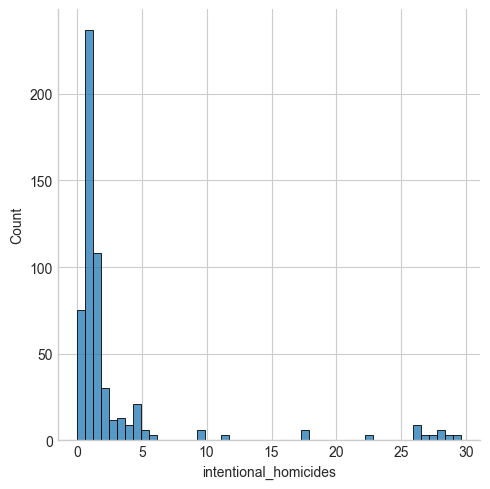

In [25]:
sns.displot(df['intentional_homicides'])

##Tax

In [26]:
NaN_tax_revenue = df[df['tax_revenue'].isnull()]
NaN_tax_revenue['country'].unique()

array(['JPN', 'MEX', 'ESP', 'TUR', 'BRA'], dtype=object)

In [27]:
NaN_tax_revenue = df[df['taxes_on_income_profits_capital'].isnull()]
NaN_tax_revenue['country'].unique()

array(['JPN', 'MEX', 'ESP', 'TUR', 'BRA'], dtype=object)

In [28]:
countries_with_only_nan_tax_revenue = set(NaN_tax_revenue['country'].unique()) - set(df[df['tax_revenue'].notnull()]['country'].unique())

for country in countries_with_only_nan_tax_revenue:
    print(country)

JPN


In [29]:
NaN_tax_revenue #both tax revenue and taxes on income profits capital is NaN in same records

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
303,JPN-2003,3.466630,2.9,NaN,29392.248992,-0.256542,0.546657,5.251,25.713354,350.392318,25.6,NaN,NaN,NaN,5.986529,83.196,JPN,2003,BOY,539.000
304,JPN-2003,3.466630,2.9,NaN,29392.248992,-0.256542,0.546657,5.251,25.713354,350.392318,25.6,NaN,NaN,NaN,5.986529,83.196,JPN,2003,GIRL,530.000
305,JPN-2003,3.466630,2.9,NaN,29392.248992,-0.256542,0.546657,5.251,25.713354,350.392318,25.6,NaN,NaN,NaN,5.986529,83.196,JPN,2003,TOT,534.000
306,JPN-2006,3.276680,2.7,NaN,33634.631707,0.249355,0.483964,4.192,26.044686,350.765432,23.9,NaN,NaN,NaN,6.174227,87.118,JPN,2006,BOY,533.000
307,JPN-2006,3.276680,2.7,NaN,33634.631707,0.249355,0.483964,4.192,26.044686,350.765432,23.9,NaN,NaN,NaN,6.174227,87.118,JPN,2006,GIRL,513.000
308,JPN-2006,3.276680,2.7,NaN,33634.631707,0.249355,0.483964,4.192,26.044686,350.765432,23.9,NaN,NaN,NaN,6.174227,87.118,JPN,2006,TOT,523.000
309,JPN-2009,3.555978,2.4,NaN,33547.283425,-1.352837,0.394951,5.068,23.624293,351.294925,24.9,NaN,NaN,NaN,7.282969,89.989,JPN,2009,BOY,534.000
310,JPN-2009,3.555978,2.4,NaN,33547.283425,-1.352837,0.394951,5.068,23.624293,351.294925,24.9,NaN,NaN,NaN,7.282969,89.989,JPN,2009,GIRL,524.000
311,JPN-2009,3.555978,2.4,NaN,33547.283425,-1.352837,0.394951,5.068,23.624293,351.294925,24.9,NaN,NaN,NaN,7.282969,89.989,JPN,2009,TOT,529.000
312,JPN-2012,3.647420,2.2,NaN,37605.974261,-0.044065,0.335540,4.358,23.773649,350.148148,21.6,NaN,NaN,NaN,8.956824,91.148,JPN,2012,BOY,544.884


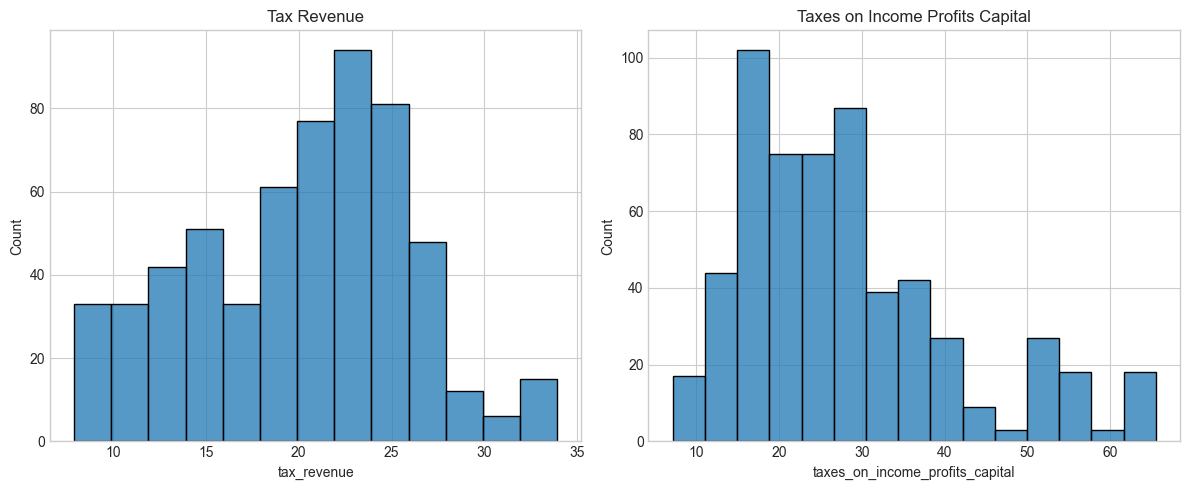

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['tax_revenue'], ax=ax1)
ax1.set_title('Tax Revenue')
sns.histplot(df['taxes_on_income_profits_capital'], ax=ax2)
ax2.set_title('Taxes on Income Profits Capital')
plt.tight_layout()
plt.show()

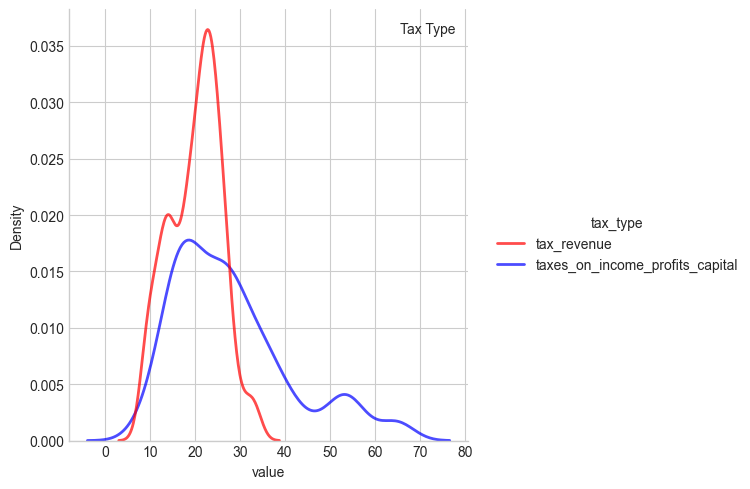

In [31]:
melted_df = df[['tax_revenue', 'taxes_on_income_profits_capital']].melt(var_name='tax_type', value_name='value')
g = sns.displot(data=melted_df, x='value', hue='tax_type', kind='kde',
                palette=['red', 'blue'],
                linewidth=2,
                alpha=0.7)

plt.legend(title='Tax Type', loc='best')
plt.show()

##Alcohol consumption



In [32]:
NaN_alcohol_consumption_per_capita = df[df['alcohol_consumption_per_capita'].notnull()]
NaN_alcohol_consumption_per_capita['time'].unique() # Only in 2015

array([2015])

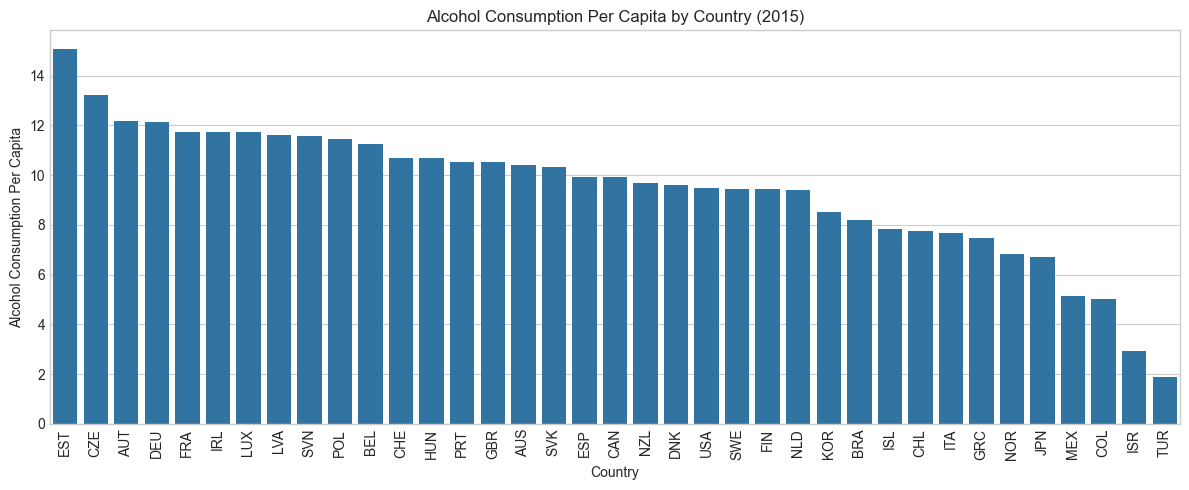

In [33]:
alcohol_2015 = NaN_alcohol_consumption_per_capita.sort_values('alcohol_consumption_per_capita', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(data=alcohol_2015, x='country', y='alcohol_consumption_per_capita')
plt.title('Alcohol Consumption Per Capita by Country (2015)')
plt.xlabel('Country')
plt.ylabel('Alcohol Consumption Per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Mortality rate infant

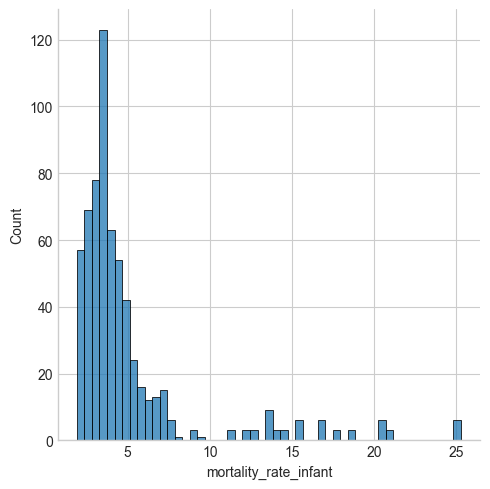

In [34]:
sns.displot(df['mortality_rate_infant'])

#Data preprocessing

In [35]:
df = df.rename(columns={'expenditure_on _education_pct_gdp': 'expenditure_on_education_pct_gdp'})

In [36]:
df = df.drop(columns=["index_code","alcohol_consumption_per_capita"])
df.head()

,expenditure_on_education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,AUS,2003,BOY,527.0
1,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,AUS,2003,GIRL,522.0
2,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,AUS,2003,TOT,524.0
3,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,AUS,2006,BOY,527.0
4,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,AUS,2006,GIRL,513.0


###Label encode

In [37]:
df = pd.get_dummies(df, columns = ['sex'])
df['sex_BOY'] = df['sex_BOY'].apply(lambda x : 1 if x == True else 0)
df['sex_GIRL'] = df['sex_GIRL'].apply(lambda x : 1 if x == True else 0)
df['sex_TOT'] = df['sex_TOT'].apply(lambda x : 1 if x == True else 0)
df.head()

,expenditure_on_education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,rating,sex_BOY,sex_GIRL,sex_TOT
0,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,AUS,2003,527.0,1,0,0
1,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,AUS,2003,522.0,0,1,0
2,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,AUS,2003,524.0,0,0,1
3,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,AUS,2006,527.0,1,0,0
4,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,AUS,2006,513.0,0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
NUM = df.select_dtypes(include=['number']).columns
CAT = df.select_dtypes(include=['object']).columns
for col in CAT:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

##Imputting

In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
NUM_imputed = pd.DataFrame(
    imputer.fit_transform(df[NUM]),
    columns=NUM,
    index=df.index
)
df_imputed = pd.concat([NUM_imputed, df[CAT]], axis=1)
df_imputed

,expenditure_on_education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,government_health_expenditure_pct_gdp,urban_population_pct_total,time,rating,sex_BOY,sex_GIRL,sex_TOT,country
0,5.246357,4.9,33.500000,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,2003.0,527.0,1.0,0.0,0.0,0
1,5.246357,4.9,33.500000,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,2003.0,522.0,0.0,1.0,0.0,0
2,5.246357,4.9,33.500000,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,2003.0,524.0,0.0,0.0,1.0,0
3,4.738430,4.7,34.542857,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,2006.0,527.0,1.0,0.0,0.0,0
4,4.738430,4.7,34.542857,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,2006.0,513.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,6.241060,14.3,51.900000,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,3.853849,85.770,2015.0,370.0,0.0,1.0,0.0,3
630,6.241060,14.3,51.900000,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,3.853849,85.770,2015.0,377.0,0.0,0.0,1.0,3
631,6.088510,13.5,53.900000,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,3.889238,86.569,2018.0,388.0,1.0,0.0,0.0,3
632,6.088510,13.5,53.900000,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,3.889238,86.569,2018.0,379.0,0.0,1.0,0.0,3


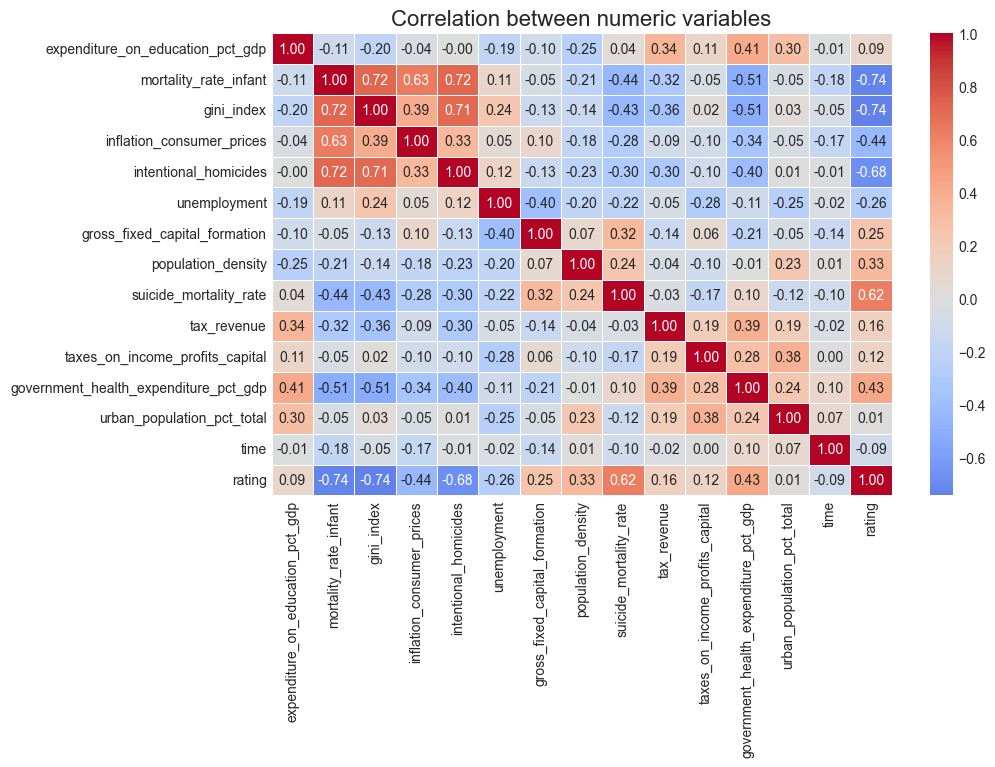

In [40]:
corr_df_imputed = df_imputed[["expenditure_on_education_pct_gdp","mortality_rate_infant","gini_index","inflation_consumer_prices","intentional_homicides","unemployment","gross_fixed_capital_formation","population_density","suicide_mortality_rate","tax_revenue","taxes_on_income_profits_capital","government_health_expenditure_pct_gdp","urban_population_pct_total","time","rating"]]
correlation_matrix = corr_df_imputed.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,linewidths=0.5,cbar=True,fmt='.2f')
plt.title("Correlation between numeric variables",fontsize=16)
plt.show()

#Data processing

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

y = df_imputed['rating']
X = df_imputed.drop(columns=['rating'])
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print(f"Average R²: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Cross-Validation R² Scores: [0.74161035 0.38476384 0.6644611  0.32764899 0.78681804]
Average R²: 0.58 (+/- 0.38)


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_metrics(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  rmse = np.sqrt(mse)
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  r2 = r2_score(y_test, y_pred)
  print(f"R squared score: {r2:.4f}")

In [43]:
def feature_importance_from_model_plot(model, inpX):
  feature_importance_df = pd.DataFrame({
      'feature': inpX.columns,
      'importance': model.feature_importances_
  })

  feature_importance_df = feature_importance_df.sort_values('importance', ascending=True)
  plt.figure(figsize=(10, 8))
  plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
  plt.xlabel('Feature Importance')
  plt.title('Feature Importances from Model')
  plt.tight_layout()
  plt.show()

##Train trest split

In [44]:
def rating_group(val):
    if val <= 357:
        return 1
    if val > 357 and val <= 410:
        return 2
    elif val > 410 and val <= 442:
        return 3
    elif val > 442 and val <= 460:
        return 4
    elif val > 460 and val <= 480:
        return 5
    elif val > 480 and val <= 508:
        return 6
    elif val > 508 and val <= 520:
        return 7
    elif val > 520 and val <= 540:
        return 8
    else:
        return 9
df_imputed['rating_groups'] = df_imputed['rating'].apply(rating_group)
df_imputed

,expenditure_on_education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,government_health_expenditure_pct_gdp,urban_population_pct_total,time,rating,sex_BOY,sex_GIRL,sex_TOT,country,rating_groups
0,5.246357,4.9,33.500000,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,2003.0,527.0,1.0,0.0,0.0,0,8
1,5.246357,4.9,33.500000,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,2003.0,522.0,0.0,1.0,0.0,0,8
2,5.246357,4.9,33.500000,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,5.623778,84.343,2003.0,524.0,0.0,0.0,1.0,0,8
3,4.738430,4.7,34.542857,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,2006.0,527.0,1.0,0.0,0.0,0,8
4,4.738430,4.7,34.542857,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,5.719998,84.700,2006.0,513.0,0.0,1.0,0.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,6.241060,14.3,51.900000,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,3.853849,85.770,2015.0,370.0,0.0,1.0,0.0,3,2
630,6.241060,14.3,51.900000,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,3.853849,85.770,2015.0,377.0,0.0,0.0,1.0,3,2
631,6.088510,13.5,53.900000,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,3.889238,86.569,2018.0,388.0,1.0,0.0,0.0,3,2
632,6.088510,13.5,53.900000,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,3.889238,86.569,2018.0,379.0,0.0,1.0,0.0,3,2


In [45]:
from sklearn.model_selection import train_test_split
stratify_base = df_imputed['rating_groups']
y = df_imputed['rating']
X = df_imputed.drop(columns=['rating','rating_groups'])

#train:test = 94:6
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104,
                                   test_size=0.06,
                                   stratify=stratify_base)
X_train.shape, X_test.shape

((595, 19), (39, 19))

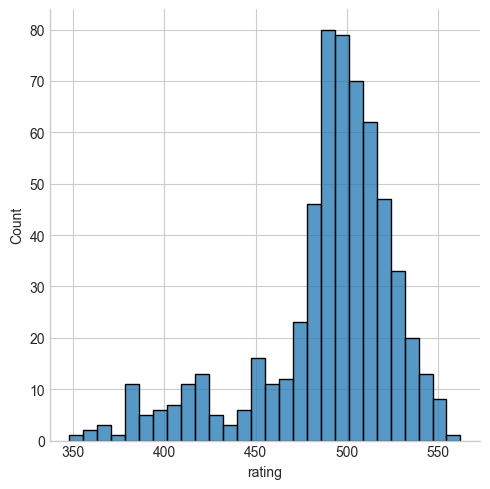

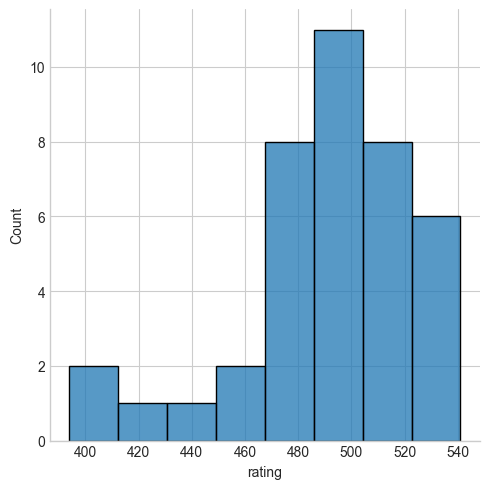

In [46]:
sns.displot(y_train)
sns.displot(y_test)

##Rating prediction with XGBoost

In [47]:
import xgboost as xgb
xgbmodel = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=500,
                         learning_rate=0.1,
                         max_depth=12,
                         max_leaves=16,
                         reg_alpha=0,
                         reg_lambda=1,
                         random_state=42)
xgbmodel.fit(X_train, y_train)

xgb_y_pred = xgbmodel.predict(X_test)

eval_metrics(y_test, xgb_y_pred)

Mean Absolute Error (MAE): 2.0769
Mean Squared Error (MSE): 7.1667
Root Mean Squared Error (RMSE): 2.6771
R squared score: 0.9931


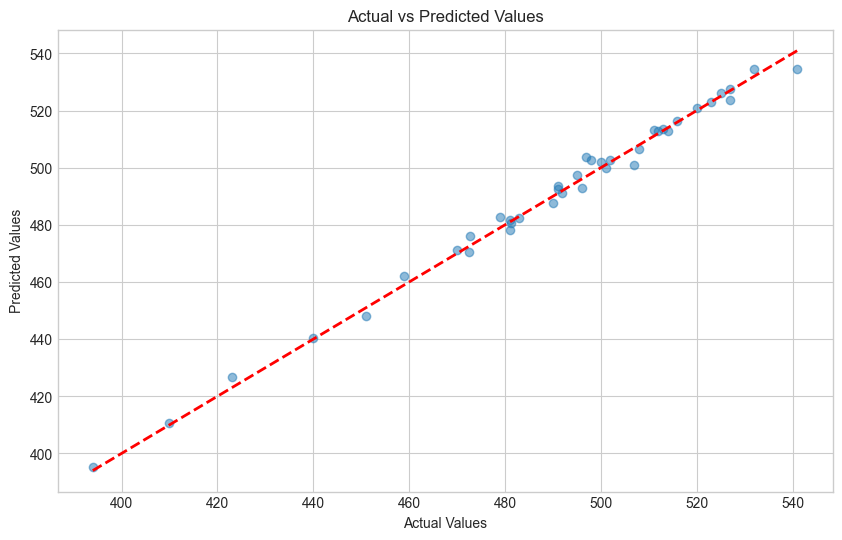

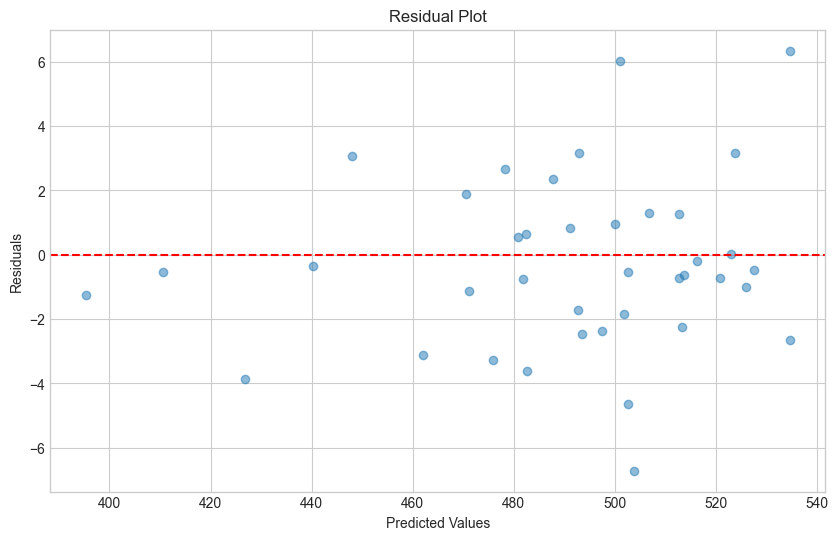

In [48]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - xgb_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(xgb_y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

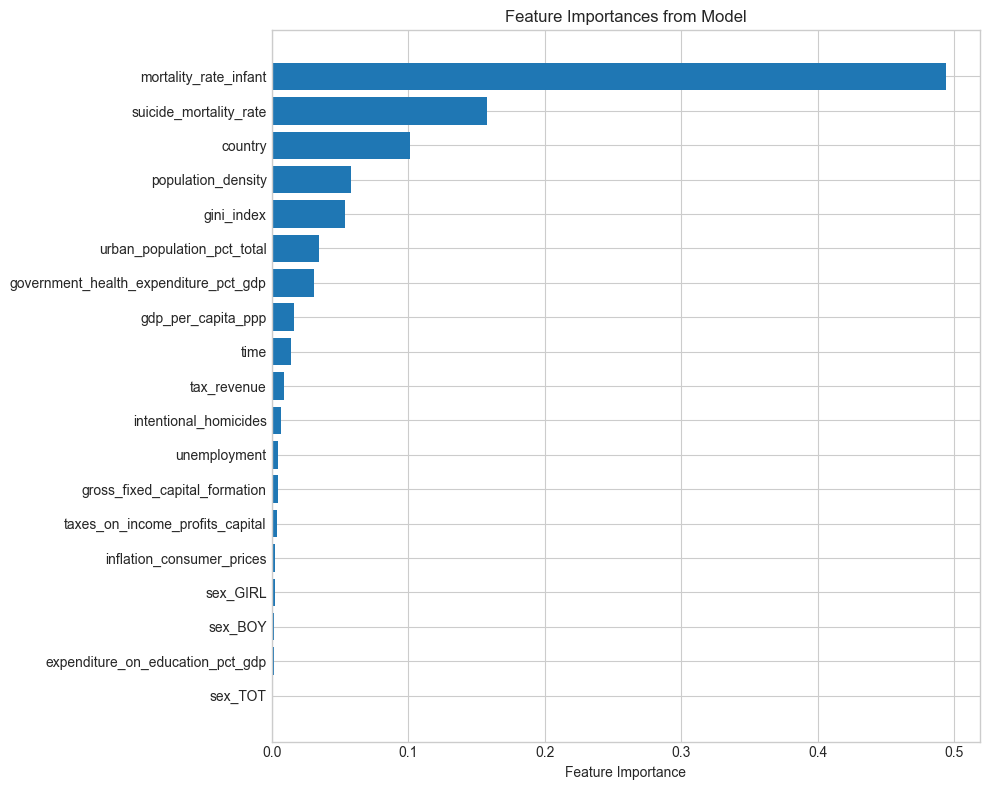

In [49]:
feature_importance_from_model_plot(xgbmodel, X)

##Rating prediction with LightGBM

In [50]:
import lightgbm as lgb
lgbmodel = lgb.LGBMRegressor(objective='regression',
                             metric='mae',
                             n_estimators=500,
                             learning_rate=0.1,
                             max_depth=12,
                             num_leaves=16,
                             min_child_samples=10,
                             reg_alpha=0,
                             reg_lambda=1,
                             random_state=42)

lgbmodel.fit(X_train, y_train)

lgb_y_pred = lgbmodel.predict(X_test)

eval_metrics(y_test, lgb_y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 19
[LightGBM] [Info] Start training from score 489.239324
Mean Absolute Error (MAE): 2.0042
Mean Squared Error (MSE): 7.0844
Root Mean Squared Error (RMSE): 2.6617
R squared score: 0.9932


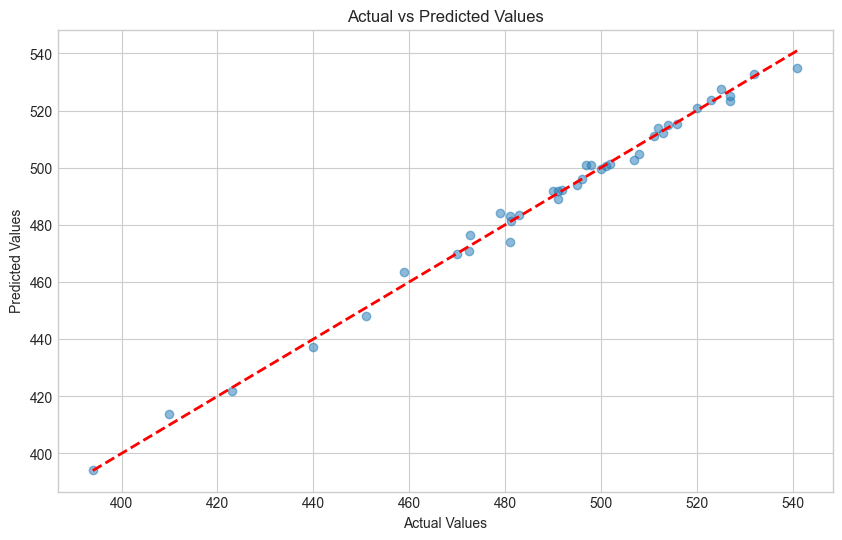

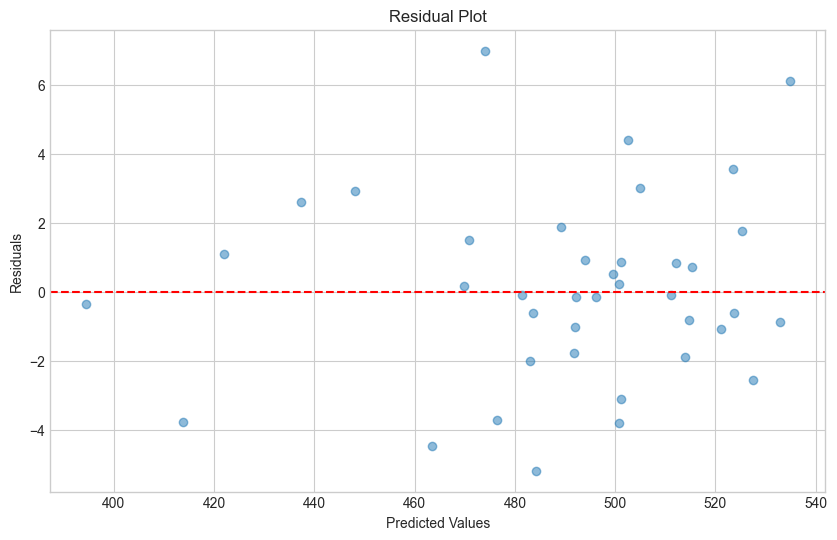

In [51]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgb_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
# Plot residuals
residuals = y_test - lgb_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(lgb_y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

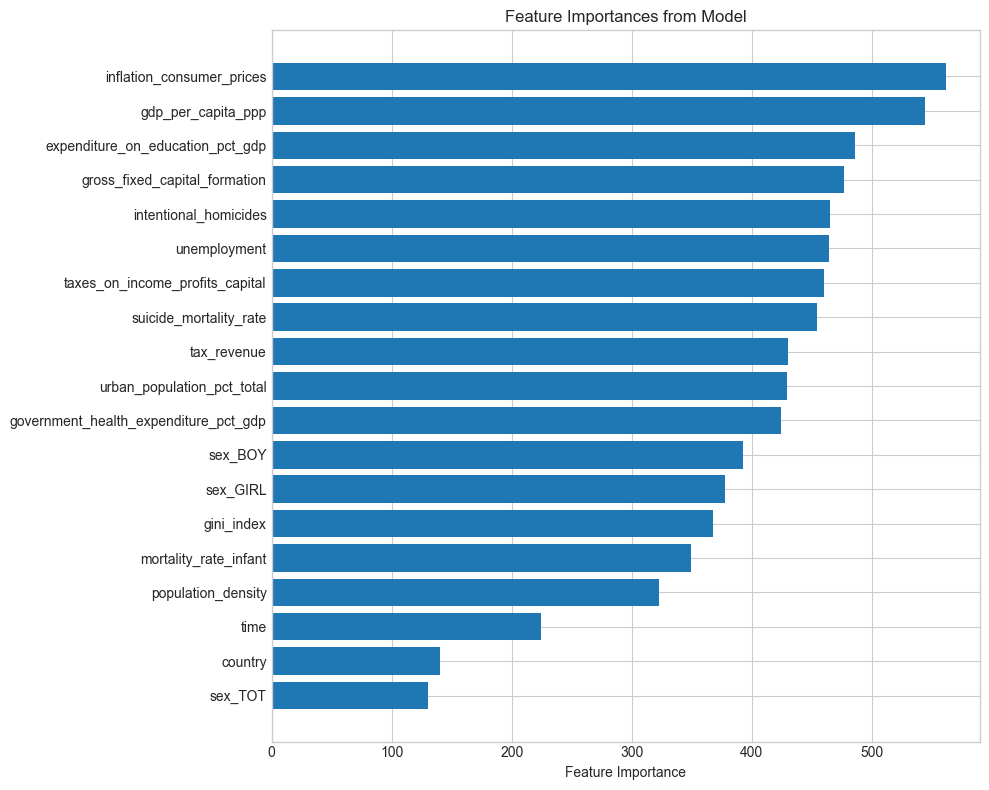

In [52]:
feature_importance_from_model_plot(lgbmodel, X)

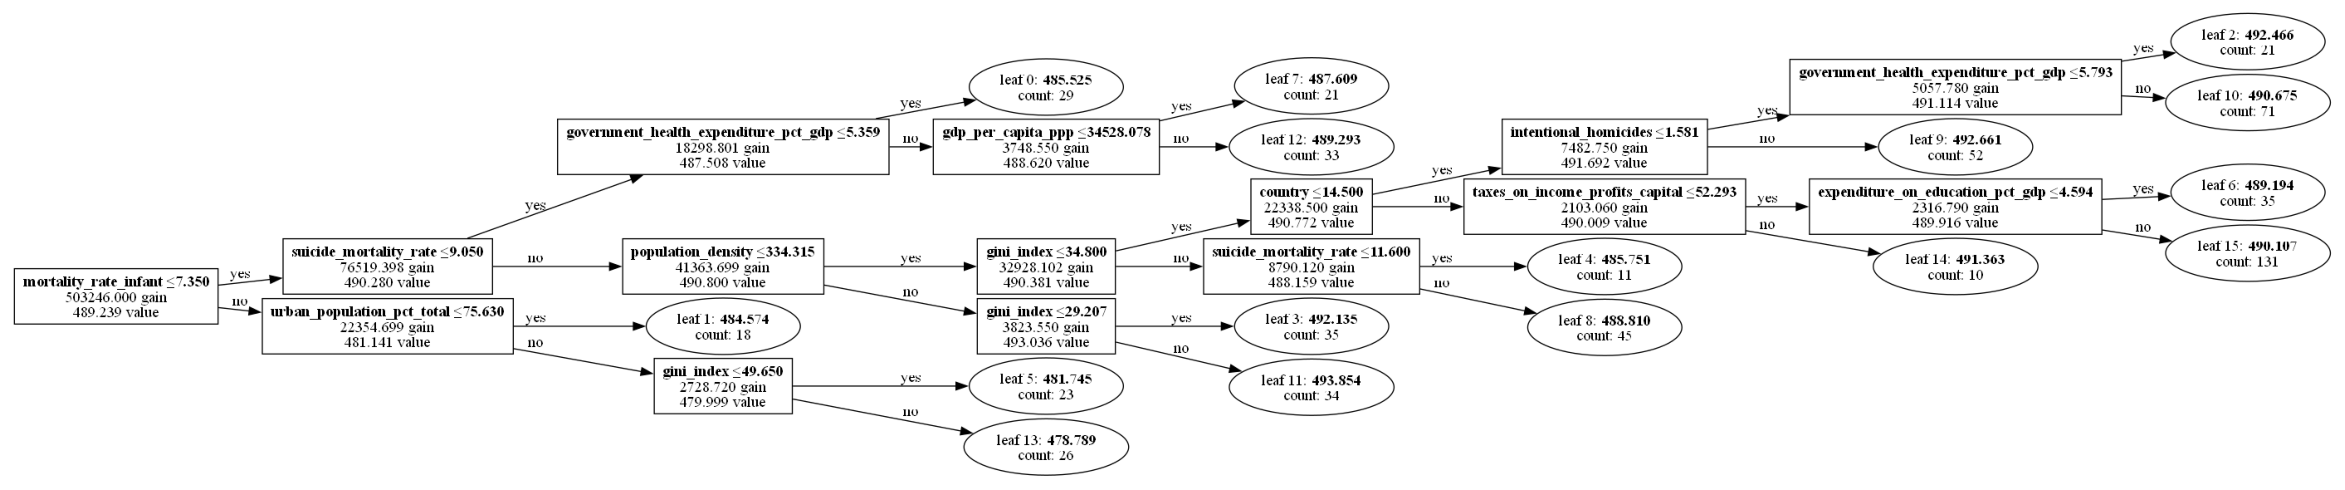

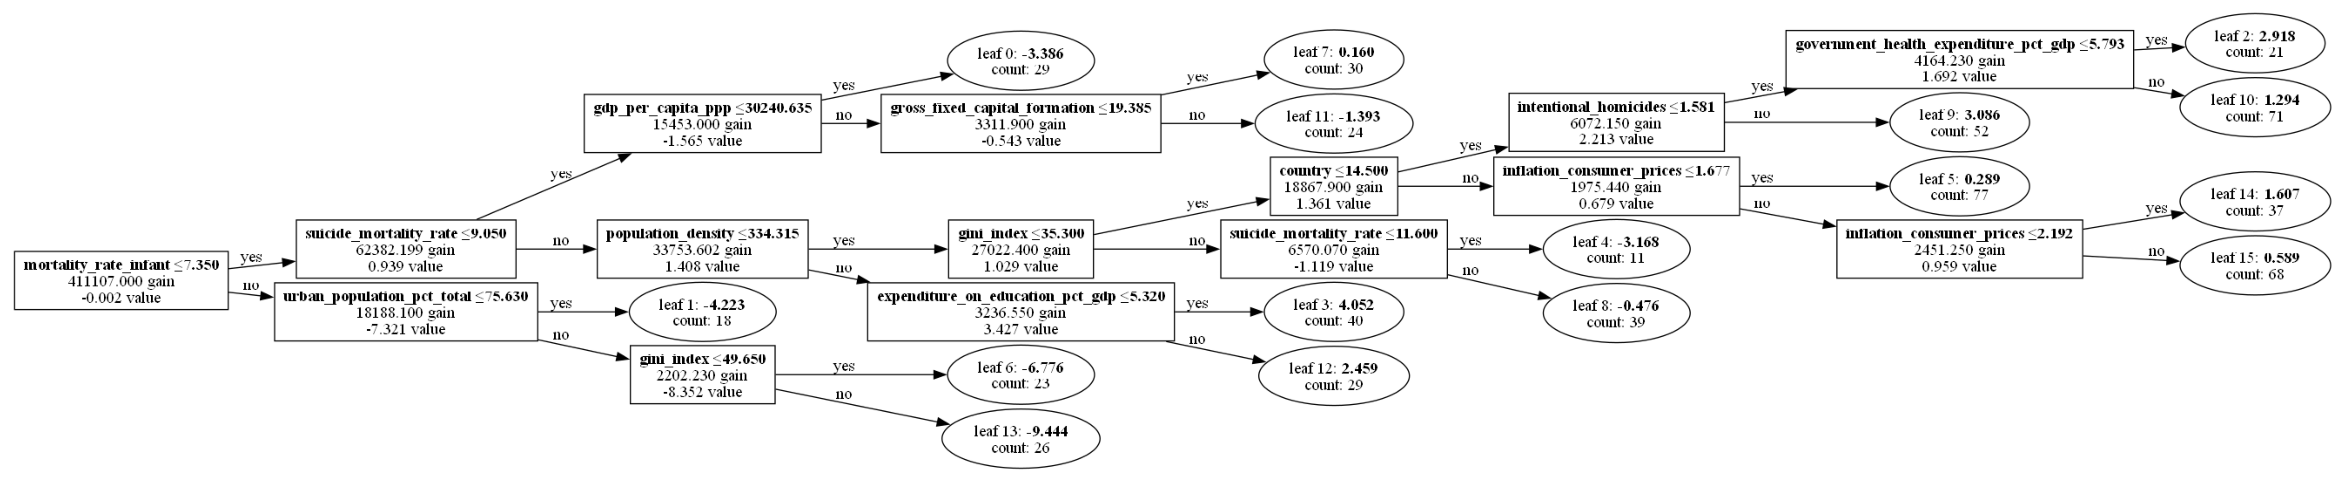

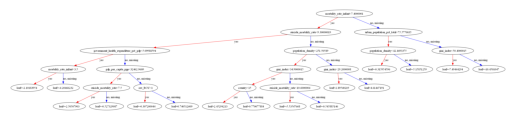

In [53]:
##show process of ligthgbm
ax = lgb.plot_tree(lgbmodel, tree_index=0, figsize=(30, 20), show_info=['split_gain', 'internal_value', 'leaf_count','leaf_value'])
plt.show()
ax = lgb.plot_tree(lgbmodel, tree_index=1, figsize=(30, 20), show_info=['split_gain', 'internal_value', 'leaf_count','leaf_value'])
plt.show()
# Cleaned-up plot_tree usage to try again
xgb.plot_tree(xgbmodel, num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]  # Ch chỉnh kích thước ảnh cho dễ nhìn
plt.show()
# We use the parameters that were successful in the past errors (0, 'LR')
# and ensure with_stats=True is present, as it enables the required data.
